In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.base import ClassifierMixin

In [3]:
# Load data
dt = pd.read_csv("MLF_GP1_CreditScore.csv")
dt.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales/Revenues            1700 non-null   float64
 1   Gross Margin              1700 non-null   float64
 2   EBITDA                    1700 non-null   float64
 3   EBITDA Margin             1700 non-null   float64
 4   Net Income Before Extras  1700 non-null   float64
 5   Total Debt                1700 non-null   float64
 6   Net Debt                  1700 non-null   float64
 7   LT Debt                   1700 non-null   float64
 8   ST Debt                   1700 non-null   float64
 9   Cash                      1700 non-null   float64
 10  Free Cash Flow            1700 non-null   float64
 11  Total Debt/EBITDA         1700 non-null   float64
 12  Net Debt/EBITDA           1700 non-null   float64
 13  Total MV                  1700 non-null   float64
 14  Total De

In [5]:
# Split X and y (InvGrd)
X = dt[dt.columns[:-2]]
y_binary = dt['InvGrd']

# Split X and y (Rating)
y_multi = dt['Rating']




In [51]:
#combine {A1,A2,A3,Aa1, Aa2, Aa3} to A
for i in range(550):
    y_multi[i] = 'A'
for i in range(550,1691):
    y_multi[i] = 'B'
for i in range(1691,1700):
    y_multi[i] = 'C'




<ipython-input-51-f7eea5465baf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_multi[i] = 'A'
<ipython-input-51-f7eea5465baf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_multi[i] = 'B'
<ipython-input-51-f7eea5465baf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_multi[i] = 'C'


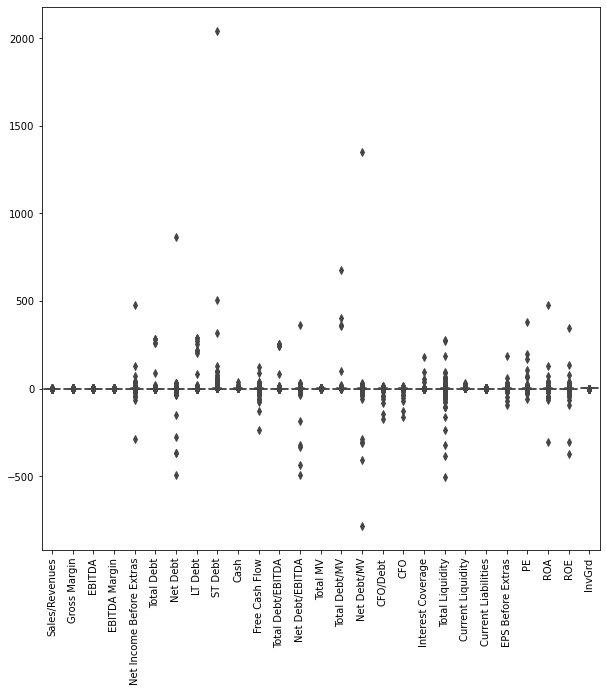

In [45]:
#EDA
#boxplot
plt.figure(figsize=(10,10))

plt.xticks(rotation=90)

sns.boxplot(data = dt)

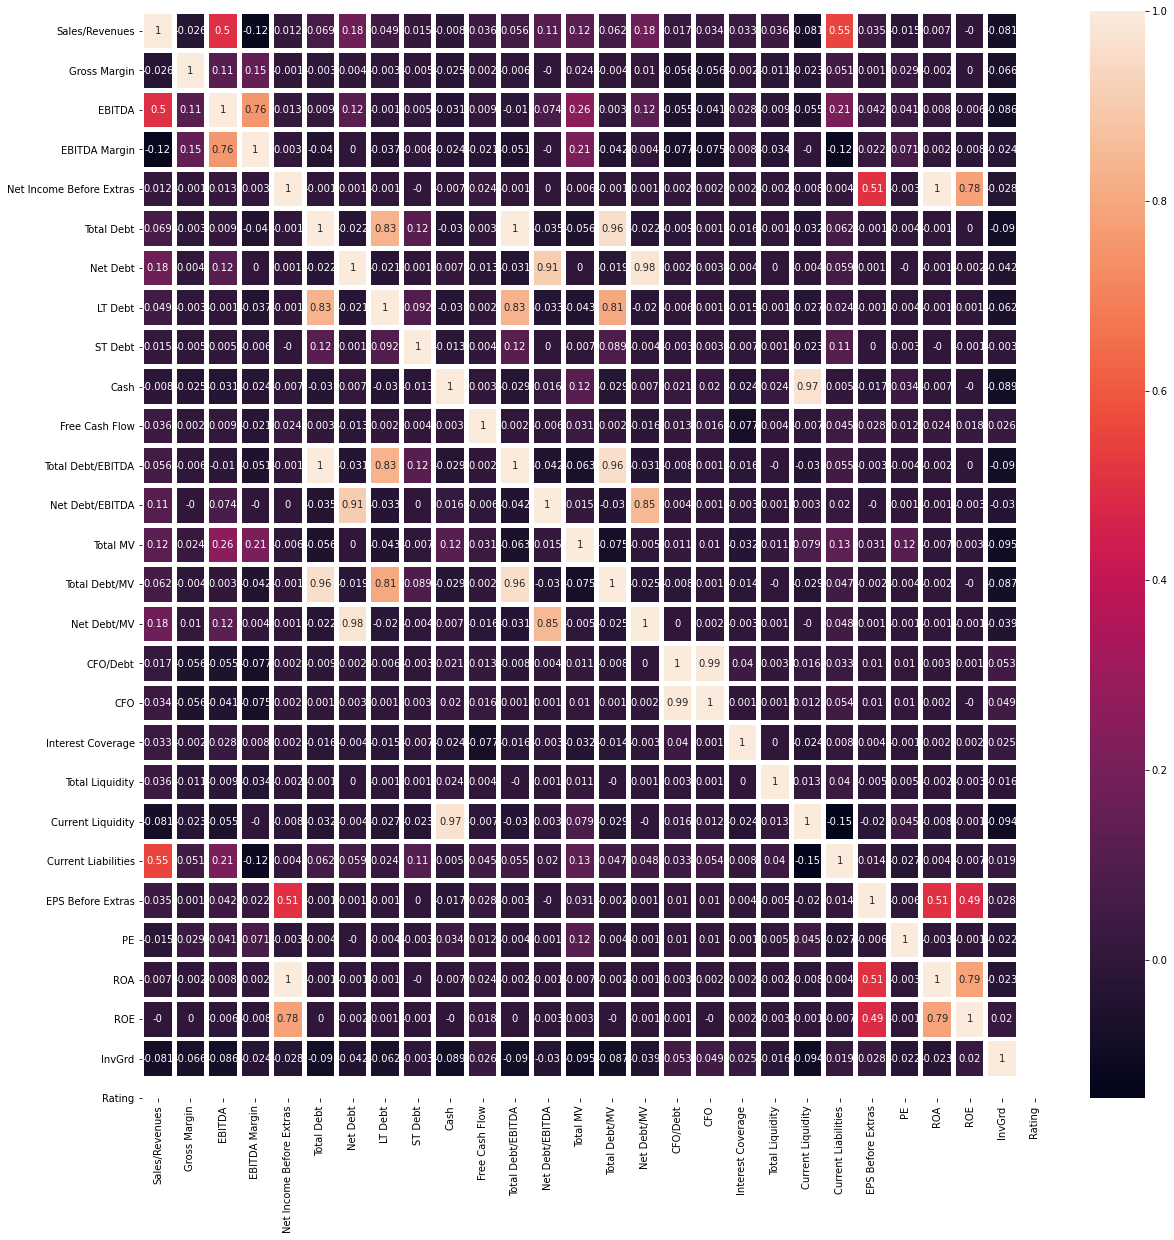

In [171]:
corr = dt.corr().round(decimals=3)

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,yticklabels=dt.columns,
                      xticklabels=dt.columns, linewidths = 4.0)

                          Sales/Revenues  Gross Margin    EBITDA  \
Sales/Revenues                  1.000000     -0.026318  0.500178   
Gross Margin                   -0.026318      1.000000  0.114092   
EBITDA                          0.500178      0.114092  1.000000   
EBITDA Margin                  -0.124079      0.147886  0.757142   
Net Income Before Extras        0.012024     -0.001061  0.012565   
Total Debt                      0.068938     -0.002665  0.008949   
Net Debt                        0.175741      0.004266  0.119251   
LT Debt                         0.048960     -0.003149 -0.000665   
ST Debt                         0.014987     -0.005417  0.004844   
Cash                           -0.008088     -0.024540 -0.030773   
Free Cash Flow                  0.035716      0.001920  0.009102   
Total Debt/EBITDA               0.056092     -0.005690 -0.009527   
Net Debt/EBITDA                 0.110201     -0.000236  0.074284   
Total MV                        0.123111      0.

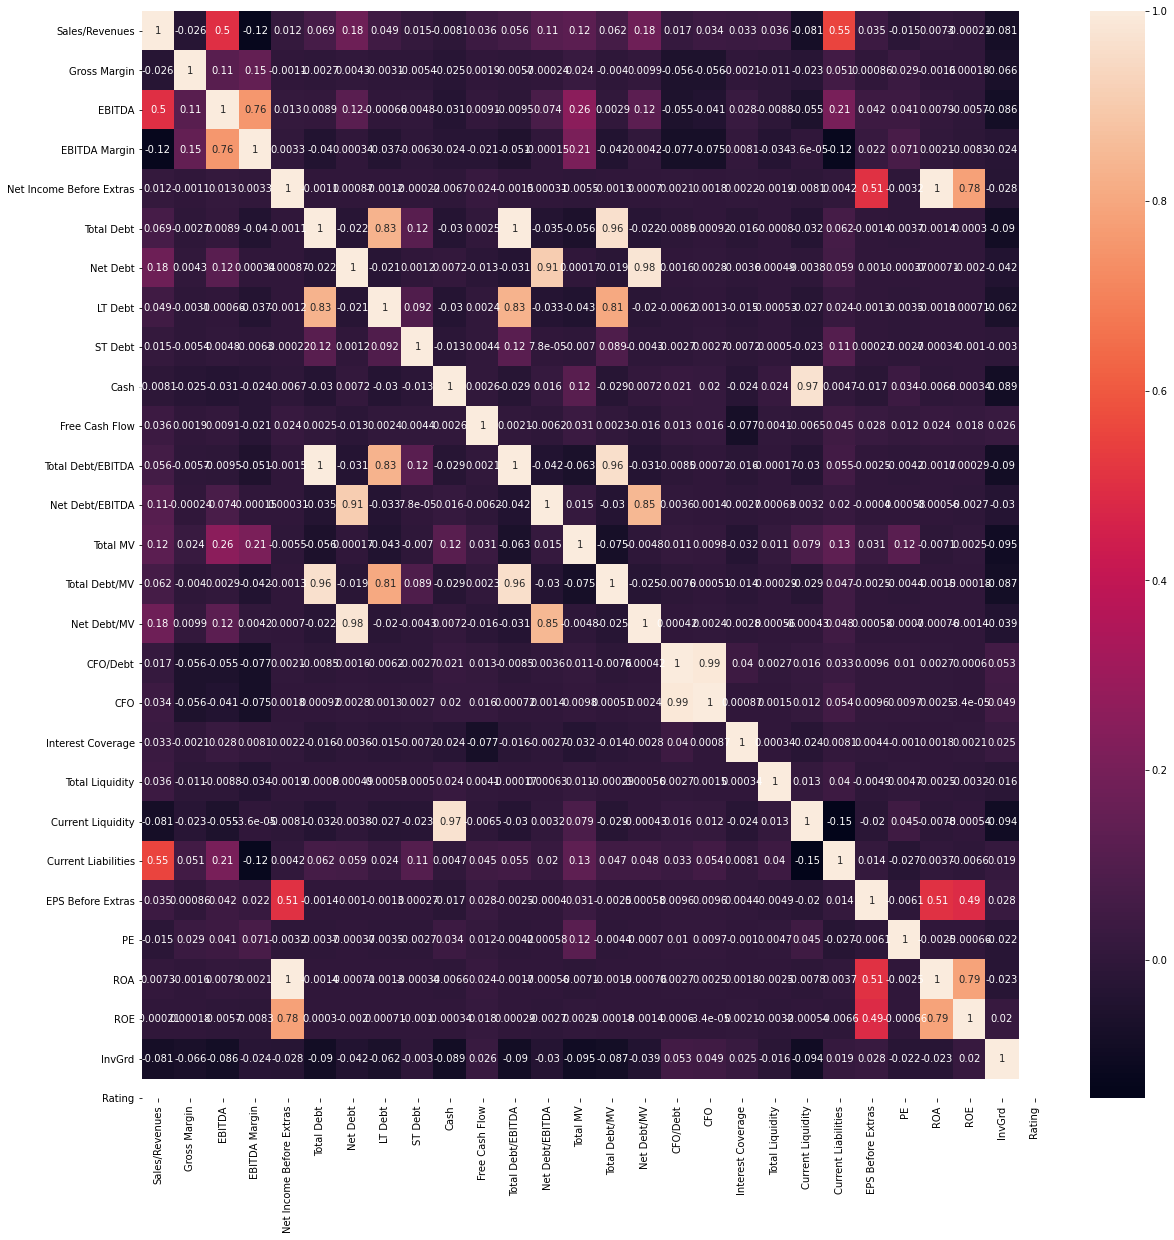

<Figure size 1440x1440 with 0 Axes>

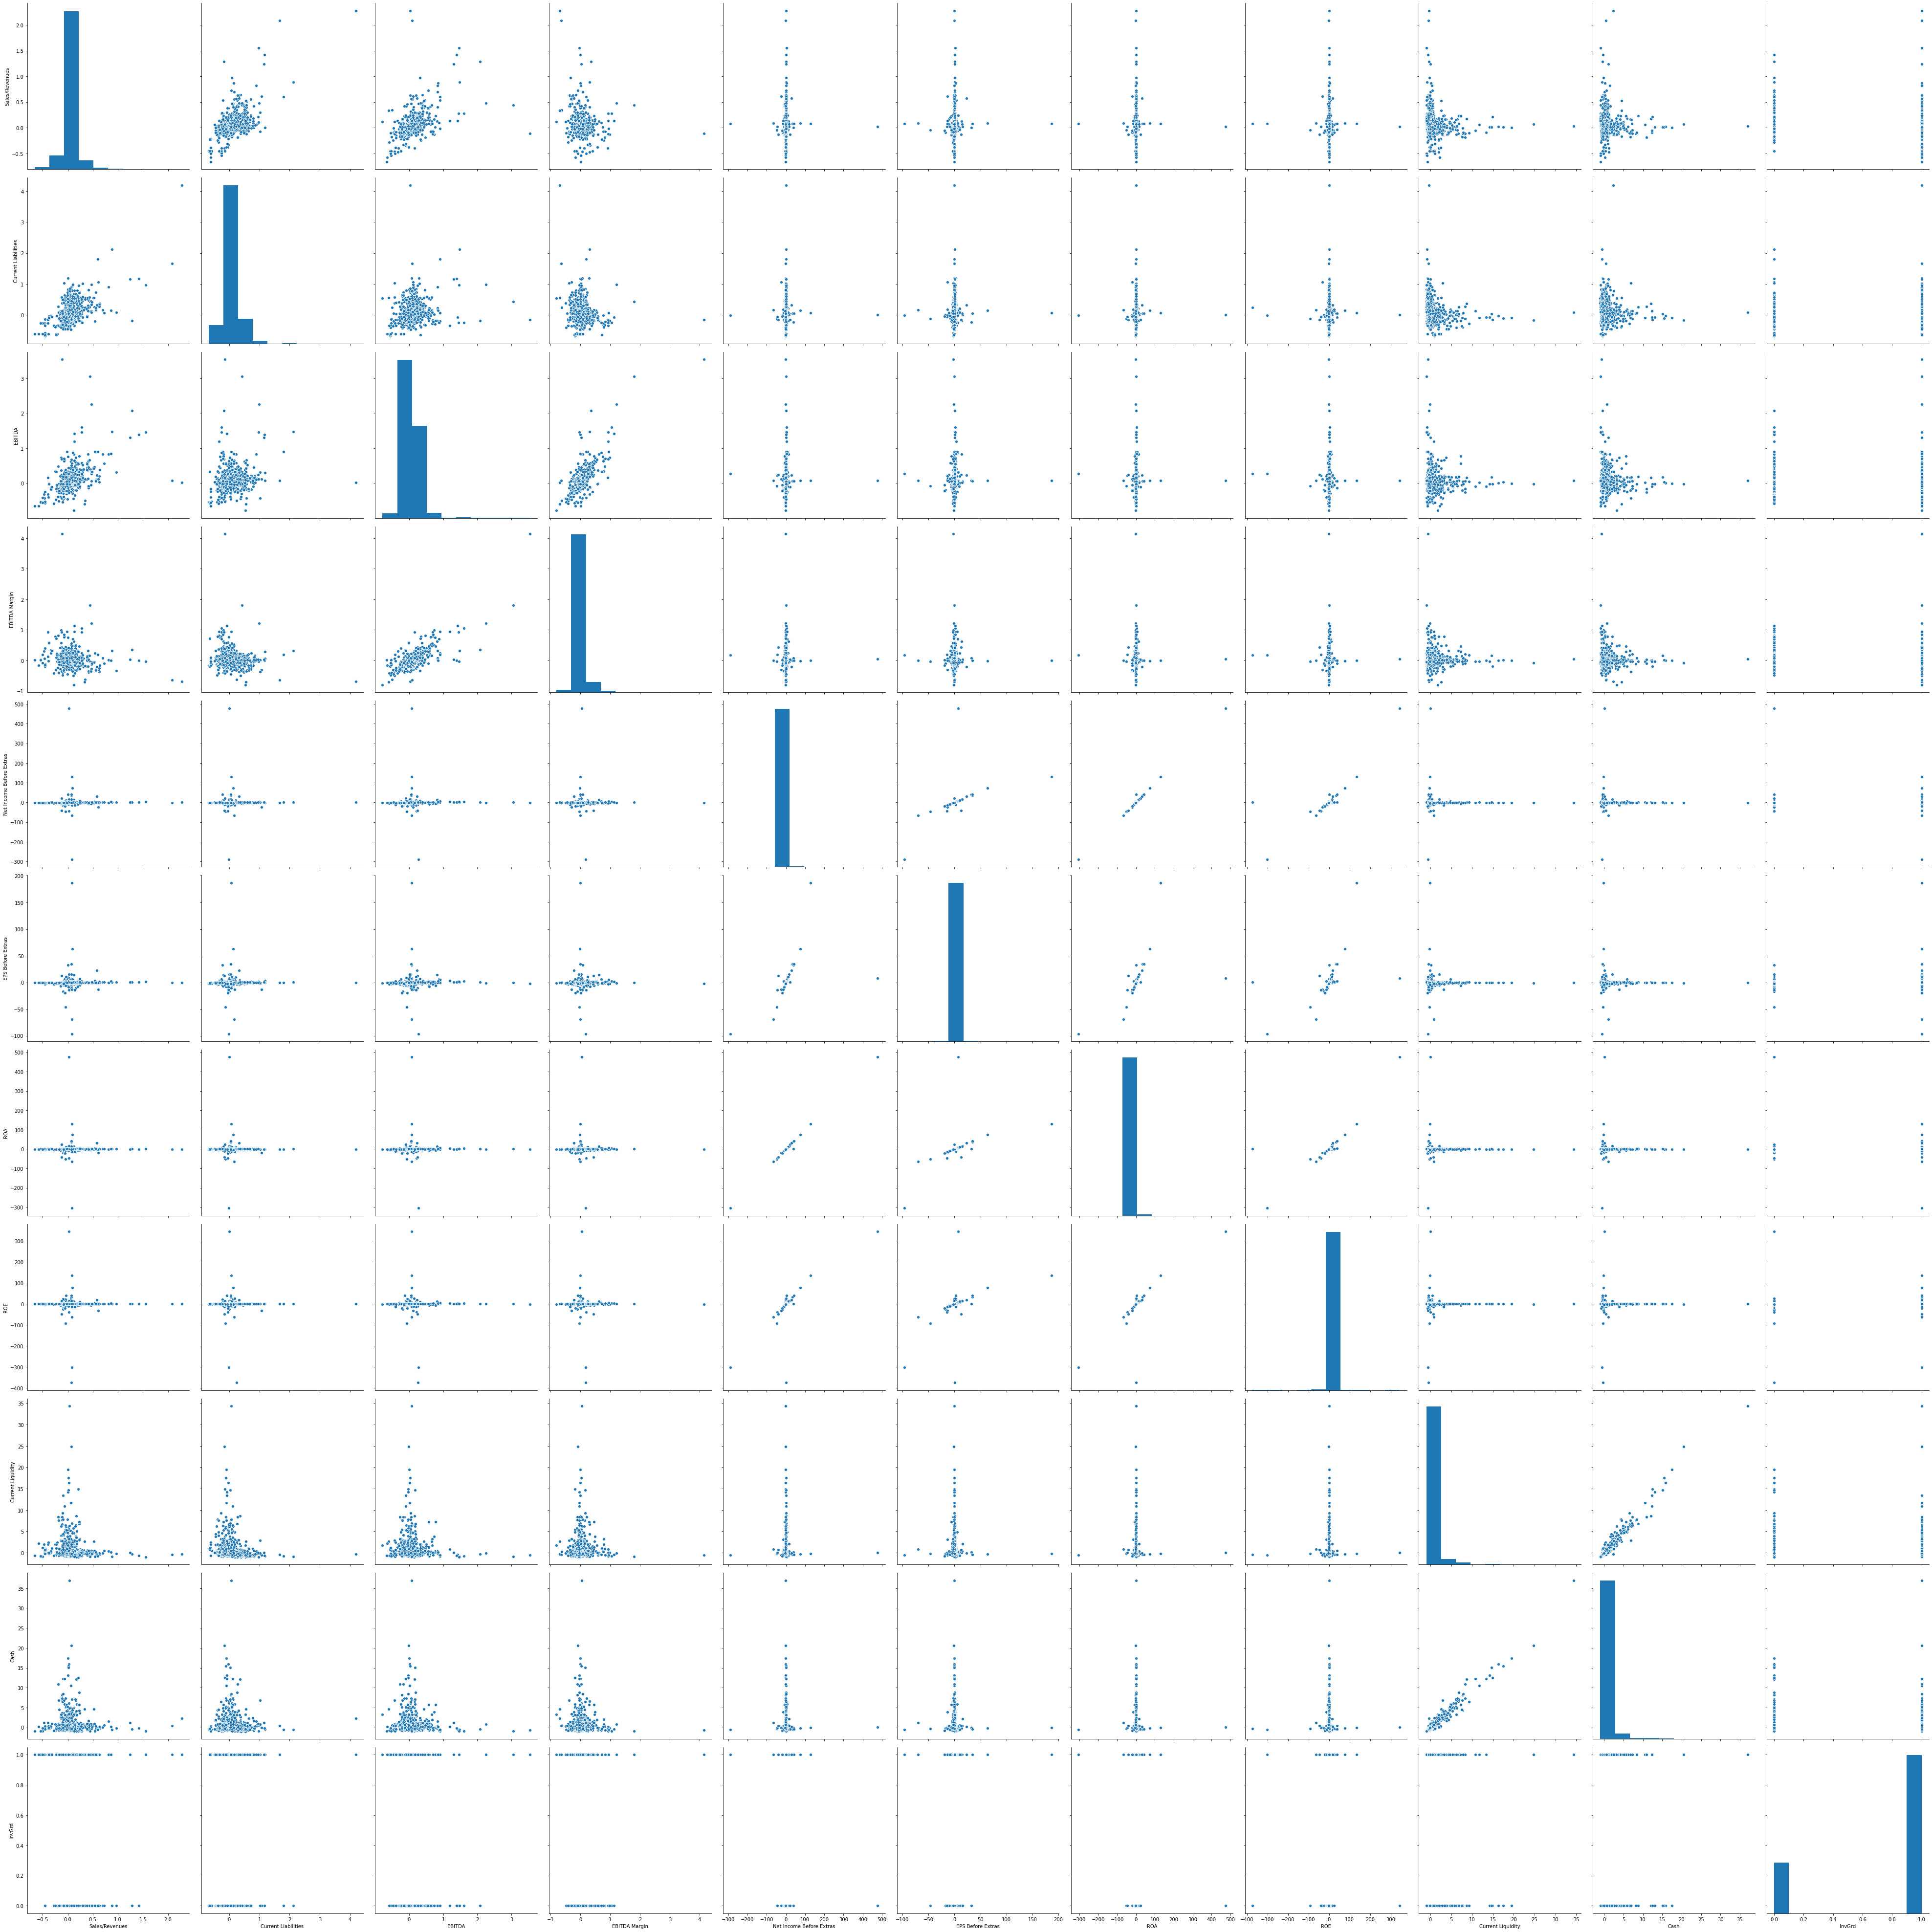

<Figure size 1440x1440 with 0 Axes>

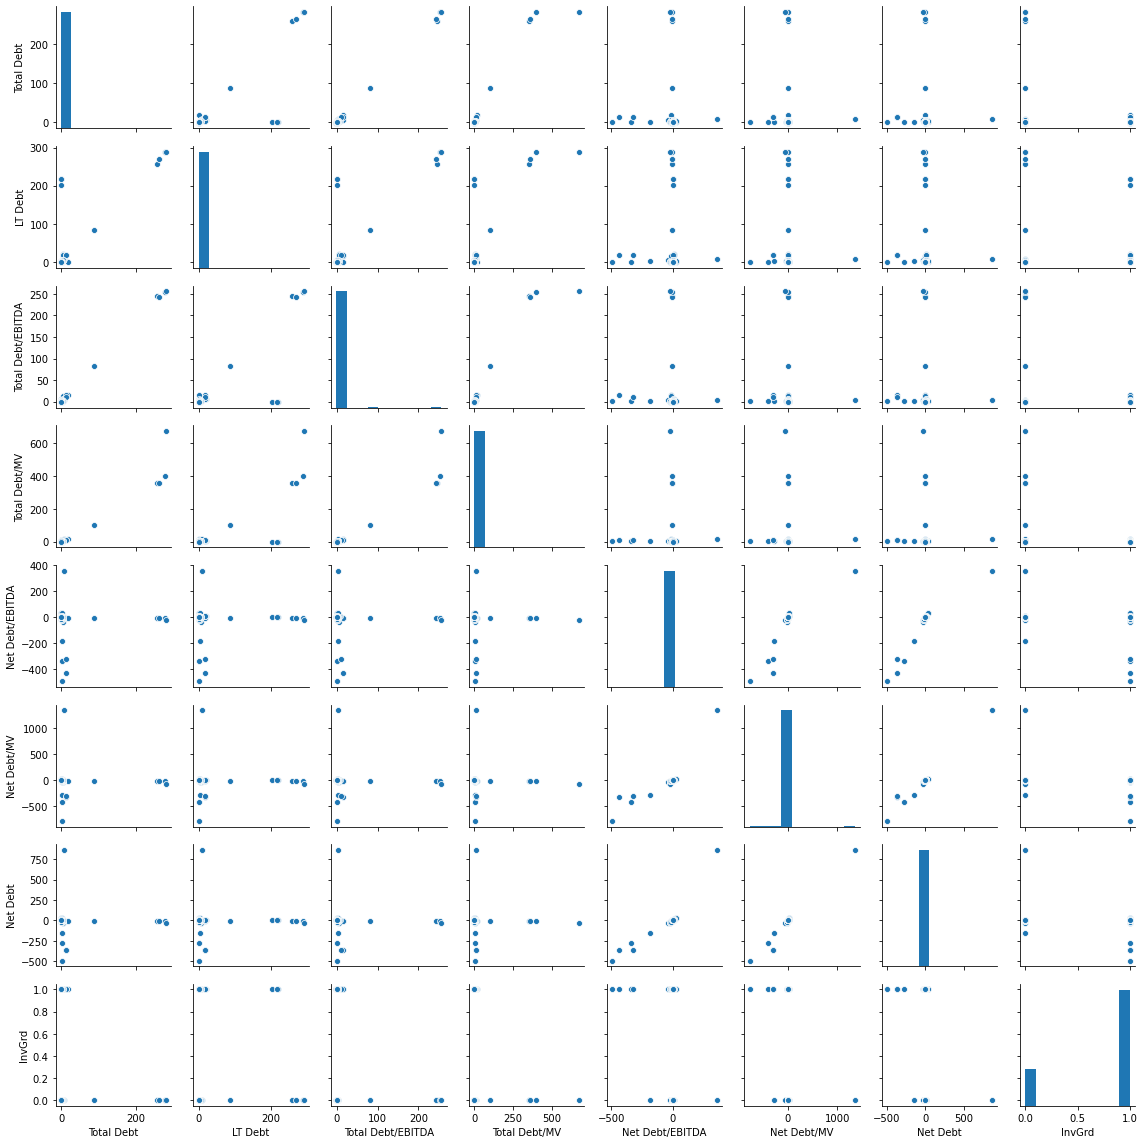

In [167]:
corr = dt.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,yticklabels=dt.columns,
                      xticklabels=dt.columns, linewidths = 5.0)

# variables for scatter plots (taking variables which are correlated and few uncorrelated variables)

corr_vars_1 = ['Sales/Revenues','Current Liabilities','EBITDA','EBITDA Margin','Net Income Before Extras',
             'EPS Before Extras','ROA','ROE','Current Liquidity','Cash','InvGrd','Rating']


corr_vars_2 = ['Total Debt','LT Debt','Total Debt/EBITDA','Total Debt/MV','Net Debt/EBITDA','Net Debt/MV', 
               'Net Debt','InvGrd','Rating']


# printing correlation matrix

print(corr)


# scatter plots of correlated variables - 1

plot1 = plt.figure(figsize=(20,20))

plot1 = sns.pairplot(dt[corr_vars_1],height=5, aspect = 5)
plot1 = plt.tight_layout()
plt.show()

plot2 = plt.figure(figsize=(20,20))

plot2 = sns.pairplot(dt[corr_vars_2],height=2)
plot2 = plt.tight_layout()
plt.show()

In [6]:
# PCA
pca = PCA(n_components=3)
pca.fit(X)
pca_X = pca.transform(X)
print(pca_X.shape)

#train test split
X_train,X_test,y_train_binary,y_test_binary  =  train_test_split(pca_X, y_binary,test_size = 0.1, stratify = y_binary, random_state = 42)

(1700, 3)


In [7]:
#standardlize
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)


In [8]:
# LogisticRegression model for binary 
lr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 100, random_state = 42)
lr.fit(X_train_std,y_train_binary)
y_pred_train_lr_binary = lr.predict(X_train_std)
y_pred_test_lr_binary  = lr.predict(X_test_std)

In [9]:
#accuracy score for log regression binary model
print("training accuracy score: ", accuracy_score(y_train_binary,y_pred_train_lr_binary))
print("test accuracy score: ", accuracy_score(y_test_binary,y_pred_test_lr_binary))
print("confusion matrix: ", "\n", confusion_matrix(y_test_binary,y_pred_test_lr_binary))
print("classification report: ", "\n", classification_report(y_test_binary,y_pred_test_lr_binary))
print("f1 score: ", "\n", f1_score(y_test_binary,y_pred_test_lr_binary))

training accuracy score:  0.7601307189542483
test accuracy score:  0.7647058823529411
confusion matrix:  
 [[  1  40]
 [  0 129]]
classification report:  
               precision    recall  f1-score   support

           0       1.00      0.02      0.05        41
           1       0.76      1.00      0.87       129

    accuracy                           0.76       170
   macro avg       0.88      0.51      0.46       170
weighted avg       0.82      0.76      0.67       170

f1 score:  
 0.8657718120805369


In [10]:
# Knn for binary 
knn_binary = KNeighborsClassifier(n_neighbors = 6)
knn_binary.fit(X_train_std, y_train_binary)
y_pred_train_knn_binary = knn_binary.predict(X_train_std)
y_pred_test_knn_binary  = knn_binary.predict(X_test_std)

In [11]:
#accuracy score for knn binary model
print("training accuracy score: ", accuracy_score(y_train_binary,y_pred_train_knn_binary))
print("test accuracy score: ", accuracy_score(y_test_binary,y_pred_test_knn_binary))
print("confusion matrix: ", "\n", confusion_matrix(y_test_binary,y_pred_test_knn_binary))
print("classification report: ", "\n", classification_report(y_test_binary,y_pred_test_knn_binary))
print("f1 score: ", "\n", f1_score(y_test_binary,y_pred_test_knn_binary))

training accuracy score:  0.8058823529411765
test accuracy score:  0.6882352941176471
confusion matrix:  
 [[ 14  27]
 [ 26 103]]
classification report:  
               precision    recall  f1-score   support

           0       0.35      0.34      0.35        41
           1       0.79      0.80      0.80       129

    accuracy                           0.69       170
   macro avg       0.57      0.57      0.57       170
weighted avg       0.69      0.69      0.69       170

f1 score:  
 0.7953667953667953


In [12]:
# Decision tree for binary 
tree_binary = DecisionTreeClassifier(max_depth=6, random_state=1)
tree_binary.fit(X_train_std, y_train_binary)
y_pred_train_tree_binary = tree_binary.predict(X_train_std)
y_pred_test_tree_binary  = tree_binary.predict(X_test_std)


In [13]:
#accuracy score for decision tree binary model
print("training accuracy score: ", accuracy_score(y_train_binary,y_pred_train_tree_binary))
print("test accuracy score: ", accuracy_score(y_test_binary,y_pred_test_tree_binary))
print("confusion matrix: ", "\n", confusion_matrix(y_test_binary,y_pred_test_tree_binary))
print("classification report: ", "\n", classification_report(y_test_binary,y_pred_test_tree_binary))
print("f1 score: ", "\n", f1_score(y_test_binary,y_pred_test_tree_binary))

training accuracy score:  0.8006535947712419
test accuracy score:  0.7529411764705882
confusion matrix:  
 [[  6  35]
 [  7 122]]
classification report:  
               precision    recall  f1-score   support

           0       0.46      0.15      0.22        41
           1       0.78      0.95      0.85       129

    accuracy                           0.75       170
   macro avg       0.62      0.55      0.54       170
weighted avg       0.70      0.75      0.70       170

f1 score:  
 0.8531468531468531


In [14]:
#grid search for knn
weights = ["uniform","distance"]
n_neighbors = [1,3,5,7,9] 
metric = ['euclidean', 'manhattan']
param_grids = {'weights' : weights,'n_neighbors': n_neighbors, 'metric' : metric}
nb_grid = KNeighborsClassifier()
grid_binary = GridSearchCV(nb_grid, param_grids, scoring = 'accuracy', cv = 5, n_jobs = 1)
grid_binary.fit(X_train_std,y_train_binary)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [15]:
grid_binary.best_score_
grid_binary.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [17]:
best_neighbors_binary = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', metric = 'manhattan')
best_neighbors_binary.fit(X_train_std,y_train_binary)
y_pred_train_tree_best_binary = best_neighbors_binary.predict(X_train_std)
y_pred_test_tree_best_binary  = best_neighbors_binary.predict(X_test_std)


In [18]:
print("training accuracy score: ", accuracy_score(y_train_binary,y_pred_train_tree_best_binary))
print("test accuracy score: ", accuracy_score(y_test_binary,y_pred_test_tree_best_binary))
print("confusion matrix: ", "\n", confusion_matrix(y_test_binary,y_pred_test_tree_best_binary))
print("classification report: ", "\n", classification_report(y_test_binary,y_pred_test_tree_best_binary))
print("f1 score: ", "\n", f1_score(y_test_binary,y_pred_test_tree_best_binary))

training accuracy score:  1.0
test accuracy score:  0.7647058823529411
confusion matrix:  
 [[ 10  31]
 [  9 120]]
classification report:  
               precision    recall  f1-score   support

           0       0.53      0.24      0.33        41
           1       0.79      0.93      0.86       129

    accuracy                           0.76       170
   macro avg       0.66      0.59      0.60       170
weighted avg       0.73      0.76      0.73       170

f1 score:  
 0.8571428571428571


In [97]:
#Ensemble 
RF = RandomForestClassifier(n_estimators = 25, max_samples = 400, random_state = 1, n_jobs = 1)



RF.fit(X_train_std, y_train_binary)

y_pred_train_rf_binary = RF.predict(X_train_std)
y_pred_test_rf_binary  = RF.predict(X_test_std)



In [98]:
#accuracy score for decision tree binary model

print("training accuracy score: ", accuracy_score(y_train_binary,y_pred_train_rf_binary))
print("test accuracy score: ", accuracy_score(y_test_binary,y_pred_test_rf_binary))
print("confusion matrix: ", "\n", confusion_matrix(y_test_binary,y_pred_test_rf_binary))
print("classification report: ", "\n", classification_report(y_test_binary,y_pred_test_rf_binary))
print("f1 score: ", "\n", f1_score(y_test_binary,y_pred_test_rf_binary))

training accuracy score:  0.838562091503268
test accuracy score:  0.7529411764705882
confusion matrix:  
 [[  5  36]
 [  6 123]]
classification report:  
               precision    recall  f1-score   support

           0       0.45      0.12      0.19        41
           1       0.77      0.95      0.85       129

    accuracy                           0.75       170
   macro avg       0.61      0.54      0.52       170
weighted avg       0.70      0.75      0.69       170

f1 score:  
 0.8541666666666667


In [52]:
#train test split
X_train_multi,X_test_multi,y_train_multi,y_test_multi  =  train_test_split(pca_X, y_multi,test_size = 0.1, stratify = y_multi, random_state = 42)
sc=StandardScaler()
sc.fit(X_train_multi)
X_train_std_multi=sc.transform(X_train_multi)
X_test_std_multi=sc.transform(X_test_multi)

In [53]:
# LogisticRegression model for multiclass
lr = LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr.fit(X_train_std_multi,y_train_multi)
y_pred_train_lr_multi = lr.predict(X_train_std_multi)
y_pred_test_lr_multi  = lr.predict(X_test_std_multi)

In [54]:
#accuracy score for log regression binary model
print("training accuracy score: ", accuracy_score(y_train_multi,y_pred_train_lr_multi))
print("test accuracy score: ", accuracy_score(y_test_multi,y_pred_test_lr_multi))
print("confusion matrix: ", "\n", confusion_matrix(y_test_multi,y_pred_test_lr_multi))

training accuracy score:  0.6712418300653594
test accuracy score:  0.6705882352941176
confusion matrix:  
 [[  0  55   0]
 [  0 114   0]
 [  0   1   0]]


In [55]:
# Knn for multiclass
knn_multi = KNeighborsClassifier(n_neighbors = 4)
knn_multi.fit(X_train_std_multi, y_train_multi)
y_pred_train_knn_multi = knn_multi.predict(X_train_std_multi)
y_pred_test_knn_multi  = knn_multi.predict(X_test_std_multi)

In [56]:
print("training accuracy score: ", accuracy_score(y_train_multi,y_pred_train_knn_multi))
print("test accuracy score: ", accuracy_score(y_test_multi,y_pred_test_knn_multi))
print("confusion matrix: ", "\n", confusion_matrix(y_test_multi,y_pred_test_knn_multi))

training accuracy score:  0.769281045751634
test accuracy score:  0.6529411764705882
confusion matrix:  
 [[27 28  0]
 [30 84  0]
 [ 0  1  0]]


In [57]:
# Decision tree for multi 
tree_multi = DecisionTreeClassifier(criterion='entropy',max_depth=6, random_state=1)
tree_multi.fit(X_train_std, y_train_multi)
y_pred_train_tree_multi = tree_multi.predict(X_train_std_multi)
y_pred_test_tree_multi  = tree_multi.predict(X_test_std_multi)

In [58]:
#accuracy score for decision tree multiclass model
print("training accuracy score: ", accuracy_score(y_train_multi,y_pred_train_tree_multi))
print("test accuracy score: ", accuracy_score(y_test_multi,y_pred_test_tree_multi))
print("confusion matrix: ", "\n", confusion_matrix(y_test_multi,y_pred_test_tree_multi))

training accuracy score:  0.6640522875816993
test accuracy score:  0.6705882352941176
confusion matrix:  
 [[  2  53   0]
 [  2 112   0]
 [  0   1   0]]


In [59]:
#svc for multiclass
svc = LinearSVC(random_state = 0,multi_class = 'ovr')
svc.fit(X_train_std_multi,y_train_multi)
y_pred_train_svc_multi = svc.predict(X_train_std_multi)
y_pred_test_svc_multi  = svc.predict(X_test_std_multi)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [60]:
print("training accuracy score: ", accuracy_score(y_train_multi,y_pred_train_svc_multi))
print("test accuracy score: ", accuracy_score(y_test_multi,y_pred_test_svc_multi))
print("confusion matrix: ", "\n", confusion_matrix(y_test_multi,y_pred_test_svc_multi))

training accuracy score:  0.6718954248366014
test accuracy score:  0.6705882352941176
confusion matrix:  
 [[  0  55   0]
 [  0 114   0]
 [  0   1   0]]


In [61]:
#hyperparameter for multiclass
weights = ["uniform","distance"]
n_neighbors = [1,3,5,7,9] 
metric = ['euclidean', 'manhattan']
param_grids = {'weights' : weights,'n_neighbors': n_neighbors, 'metric' : metric}
nb_grid = KNeighborsClassifier()
grid_multi = GridSearchCV(nb_grid, param_grids, scoring = 'accuracy', cv = 5, n_jobs = 1)
grid_multi.fit(X_train_std_multi,y_train_multi)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [62]:
grid_multi.best_score_
grid_multi.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

In [63]:
best_neighbors = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', metric = 'euclidean')
best_neighbors.fit(X_train_std_multi,y_train_multi)

y_pred_train_best_multi = best_neighbors.predict(X_train_std_multi)
y_pred_test_best_multi  = best_neighbors.predict(X_test_std_multi)

In [64]:
print("training accuracy score: ", accuracy_score(y_train_multi,y_pred_train_best_multi))
print("test accuracy score: ", accuracy_score(y_test_multi,y_pred_test_best_multi))
print("confusion matrix: ", "\n", confusion_matrix(y_test_multi,y_pred_test_best_multi))

training accuracy score:  1.0
test accuracy score:  0.711764705882353
confusion matrix:  
 [[ 21  34   0]
 [ 14 100   0]
 [  0   1   0]]


In [73]:
#ensemble
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=1000, 
                         learning_rate=0.1,
                         random_state=1)
ada = ada.fit(X_train_std_multi, y_train_multi)
y_train_pred_ada_multi = ada.predict(X_train_std_multi)
y_test_pred_ada_multi = ada.predict(X_test_std_multi)

ada_train = accuracy_score(y_train_multi, y_train_pred_ada_multi) 
ada_test = accuracy_score(y_test_multi, y_test_pred_ada_multi) 
print("confusion matrix: ", "\n", confusion_matrix(y_test_multi,y_test_pred_ada_multi))
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

confusion matrix:  
 [[23 32  0]
 [32 82  0]
 [ 1  0  0]]
AdaBoost train/test accuracies 0.555/0.618
